# COMM7370 AI Theories and Applications

# Predicting House Prices on Kaggle


Let's put all this knowledge into practice
by participating in a Kaggle competition.
[Predicting house prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) is a great place to start:
- the data is reasonably generic and does not have
- the kind of rigid structure that might require specialized models the way images or audio might.
This dataset, consists in examples and features 
covering house prices in Ames, IA from the period of 2006-2010.

In this section, we will go through details of data preprocessing,
model design, hyperparameter selection and tuning.

We hope that through a hands-on approach,
you will be able to observe the effects of capacity control,
feature extraction, etc. in practice.

This experience is vital to gaining intuition as a data scientist.

## Downloading and Caching Datasets

Throughout the course we will train and test models on various downloaded datasets. Here we implement several utility functions to facilitate data downloading. First, we maintain a dictionary `DATA_HUB` that maps a string name to a URL with the SHA-1 of the file to verify the integrity of the file. Such datasets are hosted on the `DATA_URL` site.

The following `download` function downloads the dataset from 
the URL mapping the specified dataset `name` to a local cache directory (`../data` by default).
If the file already exists in the cache directory and its SHA-1 matches the one stored in `DATA_HUB`, the cached file will be used and no downloading is needed.
That is to say, you only need to download datasets once with a network connection.
This `download` function returns the name of the downloaded file.

We also implement two additional functions: one is to download and extract a zip/tar file, and the other to download all the files from `DATA_HUB` into the cache directory. You may invoke the latter to download all these datasets once and for all if your network connection is slow.

## Kaggle

[Kaggle](https://www.kaggle.com) is a popular platform
for machine learning competitions.
It combines data, code and users in a way to allow
for both collaboration and competition.
While leaderboard chasing can sometimes get out of control,
there is also a lot to be said for the objectivity in a platform
that provides fair and direct quantitative comparisons
between your approaches and those devised by your competitors.
Moreover, you can checkout the code
from (some) other competitors' submissions
and pick apart their methods to learn new techniques.
If you want to participate in one of the competitions,
you need to register for an account as shown in 
figure.

![Kaggle website](../img/kaggle.png)



On the House Prices Prediction page as illustrated 
in the following figure,
you can find the dataset (under the "Data" tab),
submit predictions, see your ranking, etc.,
The URL is right here:

> https://www.kaggle.com/c/house-prices-advanced-regression-techniques

![House Price Prediction](../img/house_pricing.png)

## Accessing and Reading the Dataset

Note that the competition data is separated into training and test sets.
Each record includes the property value of the house
and attributes such as street type, year of construction,
roof type, basement condition, etc.
The features represent multiple data types.
Year of construction, for example, is represented with integers
roof type is a discrete categorical feature,
other features are represented with floating point numbers.
And here is where reality comes in:
for some examples, some data is altogether missing
with the missing value marked simply as 'na'.
The price of each house is included for the training set only
(it is a competition after all).
You can partition the training set to create a validation set,
but you will only find out how you perform on the official test set
when you upload your predictions and receive your score.
The "Data" tab on the competition tab has links to download the data.


We will read and process the data using `pandas` (as always).

In [1]:
%matplotlib inline
import d2l
from mxnet import autograd, init, np, npx
from mxnet.gluon import nn
import pandas as pd
npx.set_np()
import os
from mxnet import gluon
import random
import mxnet as mx

In [2]:
pip install d2l

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install mxnet

In [2]:
dataset=pd.read_csv('train_sales_data.csv')

In [3]:
dataset=dataset.drop('bodyType',axis=1)

In [4]:
dataset

,province,adcode,model,regYear,regMonth,salesVolume
0,上海,310000,3c974920a76ac9c1,2016,1,292
1,云南,530000,3c974920a76ac9c1,2016,1,466
2,内蒙古,150000,3c974920a76ac9c1,2016,1,257
3,北京,110000,3c974920a76ac9c1,2016,1,408
4,四川,510000,3c974920a76ac9c1,2016,1,610
...,...,...,...,...,...,...
43291,内蒙古,150000,32d3069d17aa47c2,2017,8,58
43292,内蒙古,150000,32d3069d17aa47c2,2017,9,74
43293,内蒙古,150000,32d3069d17aa47c2,2017,10,48
43294,内蒙古,150000,32d3069d17aa47c2,2017,11,48


In [5]:
provincename=[]
for i in dataset.province:
    if i not in provincename:
        provincename.append(i)

In [6]:
modelname=[]
for i in dataset.model:
    if i not in modelname:
        modelname.append(i)

In [7]:
num2=list(int(i) for i in range(0,len(modelname)))

In [8]:
modeldic={}
num=0
for i in modelname:
    modeldic[i]=num
    num+=1

In [9]:
listname=list(int(i) for i in range(0,len(dataset)))
dataset['Modelnum']=1
for x in listname:
        dataset['Modelnum'][x]=modeldic[dataset['model'][x]]

C:\Users\34540\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
num=list(int(i) for i in range(0,len(provincename)))

In [11]:
prodic={}
num=0
for i in provincename:
    prodic[i]=num
    num+=1

In [12]:
prodic['上海']

0

In [13]:
listname=list(int(i) for i in range(0,len(dataset)))
dataset['Citynumber']=1
for x in listname:
        dataset['Citynumber'][x]=prodic[dataset['province'][x]]

C:\Users\34540\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
dataset=dataset.drop('model',axis=1)

In [15]:
dataset=dataset.drop('province',axis=1)

In [16]:
dataset.head(5)

,adcode,regYear,regMonth,salesVolume,Modelnum,Citynumber
0,310000,2016,1,292,0,0
1,530000,2016,1,466,0,1
2,150000,2016,1,257,0,2
3,110000,2016,1,408,0,3
4,510000,2016,1,610,0,4


In [17]:

    dataNumber = len(dataset) # 数据集数据条数
    index=list(int(i) for i in range(0,len(dataset)))
    testNumber = int(dataNumber * 0.2)
    datasetnumber=[]
    for i in index:
        datasetnumber.append(i)
    testDataSet = random.sample(datasetnumber, testNumber)
    province=[]
    adcode=[]
    model=[]
    regYear=[]
    regMonth=[]
    salesVolume=[]
    Citynumber=[]
    Modelnum=[]
    for i in testDataSet:
        adcode.append(dataset['adcode'][i])
        regYear.append(dataset['regYear'][i])
        regMonth.append(dataset['regMonth'][i])
        salesVolume.append(dataset['salesVolume'][i])
        Citynumber.append(dataset['Citynumber'][i])
        Modelnum.append(dataset['Modelnum'][i])
    testsetdf={'adcode':adcode,'regYear':regYear,'regMonth':regMonth,'salesVolume':salesVolume,
             'Citynumber':Citynumber,'Modelnum':Modelnum}
    test_data=pd.DataFrame.from_dict(testsetdf,orient='index').transpose()
    test_data['regMonth']=test_data['regMonth'].astype('int64')
    test_data['salesVolume']=test_data['salesVolume'].astype('int64')
    test_data['Citynumber']=test_data['Citynumber'].astype('int64')
    test_data['adcode']=test_data['adcode'].astype('int64')
    test_data['regYear']=test_data['regYear'].astype('int64')
    test_data['Modelnum']=test_data['Modelnum'].astype('int64')
    train_data=dataset.drop(testDataSet)

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34637 entries, 0 to 43295
Data columns (total 6 columns):
adcode         34637 non-null int64
regYear        34637 non-null int64
regMonth       34637 non-null int64
salesVolume    34637 non-null int64
Modelnum       34637 non-null int64
Citynumber     34637 non-null int64
dtypes: int64(6)
memory usage: 1.8 MB


In [19]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8659 entries, 0 to 8658
Data columns (total 6 columns):
adcode         8659 non-null int64
regYear        8659 non-null int64
regMonth       8659 non-null int64
salesVolume    8659 non-null int64
Citynumber     8659 non-null int64
Modelnum       8659 non-null int64
dtypes: int64(6)
memory usage: 406.0 KB


For convenience, we download and cache the Kaggle housing dataset from the `DATA_URL` website. For the other Kaggle competitions, you may need to download them manually.

To load the two csv files
containing training and test data respectively we use Pandas.

The training dataset includes $1,460$ examples, $80$ features, and $1$ label,
while the test data contains $1,459$ examples and $80$ features.

In [20]:
print(train_data.shape)
print(test_data.shape)

(34637, 6)
(8659, 6)


In [21]:
train_data

,adcode,regYear,regMonth,salesVolume,Modelnum,Citynumber
0,310000,2016,1,292,0,0
1,530000,2016,1,466,0,1
3,110000,2016,1,408,0,3
4,510000,2016,1,610,0,4
5,340000,2016,1,206,0,5
...,...,...,...,...,...,...
43288,150000,2017,5,36,81,2
43290,150000,2017,7,67,81,2
43293,150000,2017,10,48,81,2
43294,150000,2017,11,48,81,2


In [22]:
test_data

,adcode,regYear,regMonth,salesVolume,Citynumber,Modelnum
0,370000,2017,9,994,6,52
1,320000,2016,6,572,10,65
2,440000,2017,6,278,8,57
3,340000,2017,9,360,5,32
4,310000,2016,7,97,0,81
...,...,...,...,...,...,...
8654,510000,2016,9,267,4,77
8655,350000,2017,8,102,17,70
8656,410000,2016,5,2169,13,5
8657,440000,2017,9,829,8,12


Let’s take a look at the first 4 and last 2 features
as well as the label (SalePrice) from the first 4 examples:

In [23]:
print(train_data.iloc[0:4, [0, 1, 2, 3, -3, -2, -1]])

   adcode  regYear  regMonth  salesVolume  salesVolume  Modelnum  Citynumber
0  310000     2016         1          292          292         0           0
1  530000     2016         1          466          466         0           1
3  110000     2016         1          408          408         0           3
4  510000     2016         1          610          610         0           4


We can see that in each example, the first feature is the ID.
This helps the model identify each training example.
While this is convenient, it does not carry
any information for prediction purposes.
Hence we remove it from the dataset before feeding the data into the network.

In [24]:
all_features = pd.concat((train_data.iloc[:, 0:6], test_data.iloc[:, 0:6]))

C:\Users\34540\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [25]:
all_featuresTEST=all_features.drop('salesVolume',axis=1)

In [26]:
all_featuresTEST

,Citynumber,Modelnum,adcode,regMonth,regYear
0,0,0,310000,1,2016
1,1,0,530000,1,2016
3,3,0,110000,1,2016
4,4,0,510000,1,2016
5,5,0,340000,1,2016
...,...,...,...,...,...
8654,4,77,510000,9,2016
8655,17,70,350000,8,2017
8656,13,5,410000,5,2016
8657,8,12,440000,9,2017


## Data Preprocessing

As stated above, we have a wide variety of data types.
Before we feed it into a deep network,
we need to perform some amount of processing.
Let's start with the numerical features.
We begin by replacing missing values with the mean.
This is a reasonable strategy if features are missing at random.
To adjust them to a common scale,
we rescale them to zero mean and unit variance.
This is accomplished as follows:

$$x \leftarrow \frac{x - \mu}{\sigma}.$$

To check that this transforms $x$ to data
with zero mean and unit variance simply calculate
$E[(x-\mu)/\sigma] = (\mu - \mu)/\sigma = 0$.
To check the variance we use $E[(x-\mu)^2] = \sigma^2$
and thus the transformed variable has unit variance.
The reason for "normalizing" the data is that
it brings all features to the same order of magnitude.
After all, we do not know *a priori*
which features are likely to be relevant.

In [27]:
numeric_features = all_featuresTEST.dtypes[all_features.dtypes != 'object'].index
all_featuresTEST[numeric_features] = all_featuresTEST[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# After standardizing the data all means vanish, hence we can set missing
# values to 0
all_features[numeric_features] = all_features[numeric_features].fillna(0)

In [28]:
all_featuresTEST

,Citynumber,Modelnum,adcode,regMonth,regYear
0,-1.655013,-1.711036,-0.276834,-1.593237,-0.999988
1,-1.497392,-1.711036,1.337476,-1.593237,-0.999988
3,-1.182152,-1.711036,-1.744389,-1.593237,-0.999988
4,-1.024532,-1.711036,1.190721,-1.593237,-0.999988
5,-0.866911,-1.711036,-0.056701,-1.593237,-0.999988
...,...,...,...,...,...
8654,-1.024532,1.542045,1.190721,0.724198,-0.999988
8655,1.024532,1.246310,0.016677,0.434519,0.999988
8656,0.394051,-1.499797,0.456943,-0.434519,-0.999988
8657,-0.394051,-1.204062,0.677077,0.724198,0.999988


Next we deal with discrete values.
This includes variables such as 'MSZoning'.
We replace them by a one-hot encoding
in the same manner as how we transformed multiclass classification data
into a vector of $0$ and $1$.
For instance, 'MSZoning' assumes the values 'RL' and 'RM'.
They map into vectors $(1, 0)$ and $(0, 1)$ respectively.
Pandas does this automatically for us.

In [29]:
# Dummy_na=True refers to a missing value being a legal eigenvalue, and
# creates an indicative feature for it
all_featuresTEST = pd.get_dummies(all_featuresTEST , dummy_na=True)
all_featuresTEST.shape

(43296, 5)

In [30]:
all_featuresTEST

,Citynumber,Modelnum,adcode,regMonth,regYear
0,-1.655013,-1.711036,-0.276834,-1.593237,-0.999988
1,-1.497392,-1.711036,1.337476,-1.593237,-0.999988
3,-1.182152,-1.711036,-1.744389,-1.593237,-0.999988
4,-1.024532,-1.711036,1.190721,-1.593237,-0.999988
5,-0.866911,-1.711036,-0.056701,-1.593237,-0.999988
...,...,...,...,...,...
8654,-1.024532,1.542045,1.190721,0.724198,-0.999988
8655,1.024532,1.246310,0.016677,0.434519,0.999988
8656,0.394051,-1.499797,0.456943,-0.434519,-0.999988
8657,-0.394051,-1.204062,0.677077,0.724198,0.999988


You can see that this conversion increases the number of features
from 79 to 331.
Finally, via the `values` attribute,
 we can extract the NumPy format from the Pandas dataframe
 and convert it into MXNet's native `ndarray` representation for training.

In [31]:
n_train = train_data.shape[0]
train_features = np.array(all_featuresTEST[:n_train].values, dtype=np.float32)
test_features = np.array(all_featuresTEST[n_train:].values, dtype=np.float32)
train_labels = np.array(train_data.salesVolume.values,
                        dtype=np.float32).reshape(-1, 1) #reshape to change the feactures

## Training

To get started we train a linear model with squared loss.
Not surprisingly, our linear model will not lead
to a competition winning submission
but it provides a sanity check to see whether
there is meaningful information in the data.
If we cannot do better than random guessing here,
then there might be a good chance
that we have a data processing bug.
And if things work, the linear model will serve as a baseline
giving us some intuition about how close the simple model
gets to the best reported models, giving us a sense
of how much gain we should expect from fancier models.

In [32]:
loss = gluon.loss.L2Loss()

def get_net():
    net = nn.Sequential() #让层数按顺序的叠加
    #net.add(nn.Dense(8,activation='relu'))
    net.add(nn.Dense(128,activation='sigmoid'))#加减
    net.add(nn.Dense(128,activation='sigmoid'))
    net.add(nn.Dense(1))
    net.initialize()
    return net

With house prices, as with stock prices, we care about relative quantities more than absolute quantities.
More concretely, we tend to care more
about the relative error $\frac{y - \hat{y}}{y}$
than about the absolute error $y - \hat{y}$.
For instance, if our prediction is off by USD 100,000
when estimating the price of a house in Rural Ohio,
where the value of a typical house is 125,000 USD,
then we are probably doing a horrible job.
On the other hand, if we err by this amount in Los Altos Hills, California,
this might represent a stunningly accurate prediction
(their, the median house price exceeds 4 million USD).

One way to address this problem is to
measure the discrepancy in the logarithm of the price estimates.
In fact, this is also the official error metric
used by the competition to measure the quality of submissions.
After all, a small value $\delta$ of $\log y - \log \hat{y}$
translates into $e^{-\delta} \leq \frac{\hat{y}}{y} \leq e^\delta$.
This leads to the following loss function:

$$L = \sqrt{\frac{1}{n}\sum_{i=1}^n\left(\log y_i -\log \hat{y}_i\right)^2}.$$

In [33]:
def log_rmse(net, features, labels):
    # To further stabilize the value when the logarithm is taken, set the 
    # value less than 1 as 1
    clipped_preds = np.clip(net(features), 1, float('inf')) # net（features）是一个已经处理过的数组，1是最小值，float('inf')表示正负无穷，表示最大值可以几多都得
    return np.sqrt(2 * loss(np.log(clipped_preds), np.log(labels)).mean()) #np.clip是使这个数组里面的所有数字不少1，可以无穷大

Our training functions here
will rely on the Adam optimizer
(a variant of SGD).
The main appeal of Adam vs vanilla SGD is that
the Adam optimizer, despite doing no better (and sometimes worse)
given unlimited resources for hyperparameter optimization,
people tend to find that it is significantly less sensitive
to the initial learning rate.

In [34]:
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    train_iter = d2l.load_array((train_features, train_labels), batch_size) # 把train_features 变成一个含有多维数组的一列，label都变为一个数组
    # The Adam optimization algorithm is used here                          #batch_size 是梯度，用于数据量过大的时候，分梯度训练
    trainer = gluon.Trainer(net.collect_params(), 'ADADELTA', { # gluon 用的training fuction,'adam'是一种优化模式,优化
        'learning_rate': learning_rate, 'wd': weight_decay})#优化模式网址在微信上
    for epoch in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():#记录当前数据
                l = loss(net(X), y)
            l.backward() #自动求导函数
            trainer.step(batch_size)#调用函数更新参数权值
        train_ls.append(log_rmse(net, train_features, train_labels))#每一代有一个结果
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

## k-Fold Cross-Validation

We use k-fold cross-validation
to select the model design
and to adjust the hyperparameters.
We first need a function that returns
the $i^\mathrm{th}$ fold of the data in a k-fold cross-validation procedure.
It proceeds by slicing out the $i^\mathrm{th}$ segment as validation data
and returning the rest as training data.
Note that this is not the most efficient way of handling data
and we would definitely do something much smarter
if our dataset was considerably larger.
But this added complexity might obfuscate our code unnecessarily
so we can safely omit here owing to the simplicity of our problem.

In [35]:
def get_k_fold_data(k, i, X, y):
    assert k > 1 #等价于if 
    fold_size = X.shape[0] // k  #每一个梯度的数量，batch_size 是10，这里就是10
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size) #当k为5时候
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = np.concatenate((X_train, X_part), axis=0)
            y_train = np.concatenate((y_train, y_part), axis=0)
    return X_train, y_train, X_valid, y_valid

The training and verification error averages are returned
when we train $k$ times in the k-fold cross-validation.

In [36]:
def k_fold(k, X_train, y_train, num_epochs,
           learning_rate, weight_decay, batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        net = get_net()
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1] #经过多次的代数所存在的最新的一代的lossrate的结果
        valid_l_sum += valid_ls[-1] #同上
        if i == 0:
            d2l.plot(list(range(1, num_epochs+1)), [train_ls, valid_ls],
                     xlabel='epoch', ylabel='rmse',
                     legend=['train', 'valid'], yscale='log')
        print('fold %d, train rmse: %f, valid rmse: %f' % (
            i, train_ls[-1], valid_ls[-1]))
    return train_l_sum / k, valid_l_sum / k, net

## Model Selection

In this example, we pick an un-tuned set of hyperparameters
(that can be improved).
Finding a good choice can take quite some time,
depending on how many things one wants to optimize over.
Within reason, the k-fold cross-validation approach
is resilient against multiple testing.
However, if we were to try out an unreasonably large number of options
it might fail since we might just get lucky
on the validation split with a particular set of hyperparameters.

fold 0, train rmse: 0.905806, valid rmse: 0.929338
fold 1, train rmse: 0.894880, valid rmse: 1.133559
fold 2, train rmse: 0.893611, valid rmse: 0.798862
fold 3, train rmse: 0.905318, valid rmse: 0.778587
fold 4, train rmse: 0.897958, valid rmse: 0.789550
fold 5, train rmse: 0.885997, valid rmse: 0.812946
fold 6, train rmse: 0.894139, valid rmse: 0.859664
fold 7, train rmse: 0.885341, valid rmse: 0.871407
fold 8, train rmse: 0.886991, valid rmse: 0.930477
fold 9, train rmse: 0.881247, valid rmse: 0.919222
fold 10, train rmse: 0.907178, valid rmse: 0.839749
fold 11, train rmse: 0.867834, valid rmse: 0.875063
fold 12, train rmse: 0.867473, valid rmse: 1.051179
fold 13, train rmse: 0.893287, valid rmse: 0.800494
fold 14, train rmse: 0.885935, valid rmse: 0.870429
fold 15, train rmse: 0.896012, valid rmse: 0.915954
fold 16, train rmse: 0.893568, valid rmse: 0.935891
fold 17, train rmse: 0.896182, valid rmse: 0.913206
fold 18, train rmse: 0.884982, valid rmse: 0.945182
fold 19, train rmse: 0

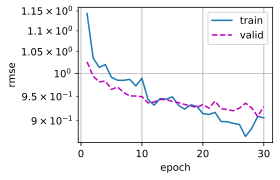

In [38]:
k, num_epochs, lr, weight_decay, batch_size = 30,58, 0.0001, 0,128
train_l, valid_l, net= k_fold(k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
print('%d-fold validation: avg train rmse: %f, avg valid rmse: %f'
      % (k, train_l, valid_l))
preds = net(test_features).asnumpy()
    # Reformat it for export to Kaggle
test_data['PresalesVolume'] = pd.Series(preds.reshape(1, -1)[0])
submission = pd.concat([test_data['adcode'],test_data['regYear'],test_data['regMonth'],test_data['Citynumber'],
                        test_data['Modelnum'] ,test_data['PresalesVolume'],test_data['salesVolume']], axis=1)
submission.to_csv('sales-0406-20-30-20%test-3learning-5.csv', index=False)

In [45]:
net

Sequential(
  (0): Dense(5 -> 8, Activation(relu))
  (1): Dense(8 -> 1, linear)
)

In [46]:
newfile=pd.read_csv('sales-0406-10-30-20%test-5learning.csv')
newfile

FileNotFoundError: [Errno 2] File b'sales-0406-10-30-20%test-5learning.csv' does not exist: b'sales-0406-10-30-20%test-5learning.csv'

In [39]:
newfile['Preprice']-newfile['Price']

0       11.559046
1       14.708157
2       13.941481
3       21.215531
4        3.788359
          ...    
5267    19.635839
5268     6.696807
5269    10.551081
5270    11.194488
5271    11.190759
Length: 5272, dtype: float64

In [46]:
newfile['difference']=newfile['Preprice']-newfile['Price']

In [66]:
number=list(int(x)for x in range(0,len(newfile)))

In [74]:
number=list(int(x)for x in range(0,len(newfile)))
for i in number:
    newfile['loss'][i]=(np.log(newfile['Preprice'][i])-np.log(newfile['Price'][i]))**2

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [78]:
np.sqrt(sum(newfile['loss'])/len(newfile)) # New result loss 0.8% 

0.008094534697252444

In [80]:
newfile.to_csv('256-30-50-20%test-3learning-withloss.csv')

In [45]:
newfile['loss'].describe()

count    5272.000000
mean       11.386401
std         6.406812
min       -20.491046
25%         8.068862
50%        11.552281
75%        14.849613
max        59.079764
Name: loss, dtype: float64

In [52]:
net2=get_net()
predict_features = np.array(test_data['Preprice'].values, dtype=np.float32)
result_labels = np.array(test_data['Price'].values,
                        dtype=np.float32).reshape(-1, 1) #reshape to change the feactures
for epoch in range(num_epochs):
    log_rmse(net2,predict_features,result_labels)

In [31]:
log_rmse(net2,predict_features,result_labels)

array(7.373338)

You will notice that sometimes the number of training errors
for a set of hyper-parameters can be very low,
while the number of errors for the $K$-fold cross-validation may be higher. This is an indicator that we are overfitting.
Therefore, when we reduce the amount of training errors,
we need to check whether the amount of errors
in the k-fold cross-validation have also been reduced accordingly.

##  Predict and Submit

Now that we know what a good choice of hyperparameters should be,
we might as well use all the data to train on it
(rather than just $1-1/k$ of the data
that is used in the cross-validation slices).
The model that we obtain in this way
can then be applied to the test set.
Saving the estimates in a CSV file
will simplify uploading the results to Kaggle.

In [42]:
def train_and_pred(train_features, test_feature, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size):
    net = get_net()
    train_ls, _ = train(net, train_features, train_labels, None, None,
                        num_epochs, lr, weight_decay, batch_size)
    d2l.plot(np.arange(1, num_epochs + 1), [train_ls], xlabel='epoch',
             ylabel='rmse', yscale='log')
    print('train rmse %f' % train_ls[-1])
    # Apply the network to the test set
    preds = net(test_features).asnumpy()
    # Reformat it for export to Kaggle
    test_data['PresalesVolume'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['adcode'],test_data['regYear'],test_data['regMonth'],test_data['Citynumber'],
                        test_data['Modelnum'] ,test_data['PresalesVolume'],test_data['salesVolume']], axis=1)
    submission.to_csv('sales-0406-10-30-20%test-5learning.csv', index=False)

Let's invoke our model.
One nice sanity check is to see
whether the predictions on the test set
resemble those of the k-fold cross-validation process.
If they do, it is time to upload them to Kaggle.
The following code will generate a file called `submission.csv` in the `data` folder
(CSV is one of the file formats accepted by Kaggle):

train rmse 1.127132


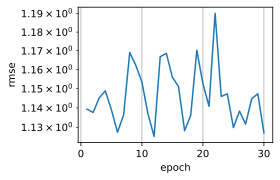

In [43]:
train_and_pred(train_features, test_features, train_labels, test_data,
               num_epochs, lr, weight_decay, batch_size)

In [49]:
newfiletes=pd.read_csv('submissionnew-0331-256-10-30-50%test.csv')

In [50]:
newfiletes.groupby('Pricetimestamp').mean()

,Unnamed: 0,Price
Pricetimestamp,,
1582214400,369.572222,1641.024432
1582300800,1168.184270,1642.372455
1582473600,1711.209091,1646.017891
1582560000,1974.200000,1645.307092
1582646400,2402.022727,1643.734805
1582732800,3052.338624,1643.092896
1582819200,3829.911839,1640.754505
1582905600,4673.056511,1606.272698
1583078400,5456.982507,1602.043580


Next, as demonstrated in figure, we can submit our predictions on Kaggle
and see how they compare to the actual house prices (labels) on the test set.
The steps are quite simple:

* Log in to the Kaggle website and visit the House Price Prediction Competition page.
* Click the “Submit Predictions” or “Late Submission” button (as of this writing, the button is located on the right).
* Click the “Upload Submission File” button in the dashed box at the bottom of the page and select the prediction file you wish to upload.
* Click the “Make Submission” button at the bottom of the page to view your results.

![Submitting data to Kaggle](../img/kaggle_submit2.png)



## Summary

* Real data often contains a mix of different data types and needs to be preprocessed.
* Rescaling real-valued data to zero mean and unit variance is a good default. So is replacing missing values with their mean.
* Transforming categorical variables into indicator variables allows us to treat them like vectors.
* We can use k-fold cross validation to select the model and adjust the hyper-parameters.
* Logarithms are useful for relative loss.


## Exercises

1. Submit your predictions for this tutorial to Kaggle. How good are your predictions?
1. Can you improve your model by minimizing the log-price directly? What happens if you try to predict the log price rather than the price?
1. Is it always a good idea to replace missing values by their mean?
1. Improve the score on Kaggle by tuning the hyperparameters through k-fold cross-validation.
1. Improve the score by improving the model (layers, regularization, dropout).
1. What happens if we do not standardize the continuous numerical features like we have done in this section?

- Course Instructor: Dr. Paolo Mengoni (Visiting Scholar, School of Communication, Hong Kong Baptist University) 
  - pmengoni@hkbu.edu.hk

- The codes in this notebook take insipiration from various sources. Most of the code is based on *Dive into Deep Learning* book. All codes are for educational purposes only and released under the CC1.0. 